In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# read data
df = pd.read_csv(r'D:\agnext\Agnext\ML\dataset\headbrain.csv')
print(df.shape)
print(df.head())

(237, 4)
   Gender  Age Range  Head Size(cm^3)  Brain Weight(grams)
0       1          1             4512                 1530
1       1          1             3738                 1297
2       1          1             4261                 1335
3       1          1             3777                 1282
4       1          1             4177                 1590


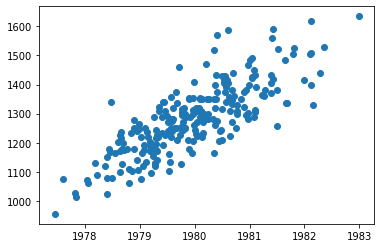

In [22]:
# collect data
X = df['Head Size(cm^3)'].values
y = df['Brain Weight(grams)'].values

plt.plot_date(X, y, 'o')
plt.show()

In [23]:
# now finding its mean 
mean_x = np.mean(X)
mean_y = np.mean(y)

print(mean_x, mean_y)


3633.9915611814345 1282.873417721519


In [24]:
# now finding (x - mean_x) and (y - mean_y)

x_sub = X - mean_x
y_sub = y - mean_y

print(type(x_sub))

<class 'numpy.ndarray'>


In [25]:
# nofind in (x - mean_x)*(y - mean_y)

num = np.sum(x_sub * y_sub)

# nofind in (x - mean_x)^2

den = np.sum(x_sub ** 2)


In [26]:
# the slope is 
m = num / den

print(m)

0.2634293394893993


In [27]:
# now find the intercept
c = mean_y - (m * mean_x)

print(c)

325.5734210494428


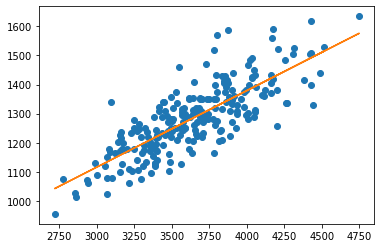

In [28]:
# now plotting the line
plt.plot(X,y, 'o')
plt.plot(X, m * X + c, '-')
plt.show()

In [29]:
# now calculating the r-squared
# calculate the mean of the residuals
residuals = y - (m * X + c)
num = np.sum(residuals ** 2)

# calculate the mean of (y - mean_y) **2
den = np.sum((y - mean_y) ** 2)

r = num/den
print(r)

0.360688280043


# Now doing it by sklearn 

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# cannot use Rank 1 matrix in scikit learn
# so we need to convert it to 2d
X = X.reshape(-1, 1)

# creating model object 
regm = LinearRegression()

# fitting the data 
reg = regm.fit(X, y)

print (reg.intercept_)
print (reg.coef_[0])
# print (reg.slope)

r = reg.score(X, y)
print(r)


325.5734210494426
0.26342933948939934
0.639311719957


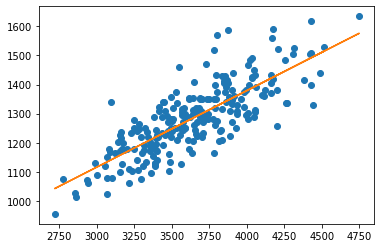

In [45]:
plt.plot(X,y, 'o')
plt.plot(X, reg.coef_[0] * X + reg.intercept_, '-')
plt.show()